In [43]:
from SpectralCV import ecog_pipe as ep
import numpy as np
import scipy as sp
import scipy.io as io
import scipy.signal as sig
import math as math
import random 
from scipy import integrate
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [19]:
#grab data path
data_path ="\\Users\\Lauren\\Data\\20120730PF_Anesthesia+and+Sleep_Chibi_Toru+Yanagawa_mat_ECoG128\\Session%d\\"
monkeyChan = 129

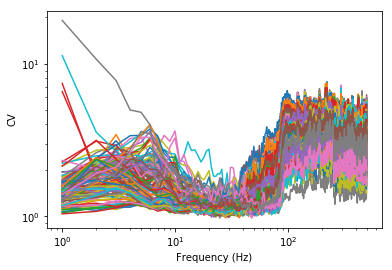

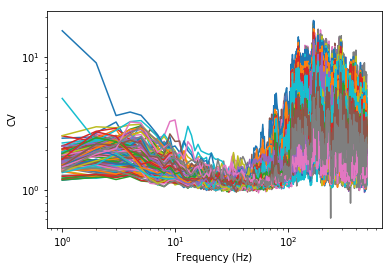

In [11]:
# looping through all the channels
for i in range(1,monkeyChan):
    #grabbing session 1 channel i
    data = ep.getECoGdata(data_path, 1, i)
    #grabbing TimeFile from session 1 to set the indices for each condition
    tf1 = ep.getTimeFile(data_path, 1)    
    # AwakeEyesOpened
    s1start1 = ep.getStart(tf1, 0)
    s1end1 = ep.getEnd(tf1, 1)
    s1SP1 = ep.getSP(data, s1start1, s1end1, 1000, 1000, 500)
    ep.scv(s1SP1)
    plt.figure(1)
    ep.plotScv(s1SP1)
    # AwakeEyesClosed
    s1start2 = ep.getStart(tf1, 2)
    s1end2 = ep.getEnd(tf1, 3)
    s1SP2 = ep.getSP(data, s1start2, s1end2, 1000, 1000, 500)
    ep.scv(s1SP2)
    plt.figure(2)
    ep.plotScv(s1SP2)

In [27]:
cond = 5
chan = monkeyChan
data = ep.getECoGdata(data_path, 1, 1)
f_axis, f_time, spg = sig.spectrogram(data, fs=1000., nperseg=1000, noverlap=500)
frequency = len(f_axis)
bread = np.zeros((cond, chan, frequency))

In [26]:
def getFreq(data, fs, nperseg, noverlap):
    f_axis, f_time, spg = sig.spectrogram(data, fs=fs, nperseg=fs, noverlap=fs)
    return len(f_axis)

In [31]:
# session 1
for i in range(1,monkeyChan):
    #grabbing session 1 channel i
    data = ep.getECoGdata(data_path, 1, i)
    #grabbing TimeFile from session 1 to set the indices for each condition
    tf1 = ep.getTimeFile(data_path, 1)    
    # AwakeEyesOpened
    s1start1 = ep.getStart(tf1, 0)
    s1end1 = ep.getEnd(tf1, 1)
    s1SP1 = ep.getSP(data, s1start1, s1end1, 1000, 1000, 500)
    bread[0][i-1][:] = ep.scv(s1SP1)
    #AwakeEyesClosed
    s1start2 = ep.getStart(tf1, 2)
    s1end2 = ep.getEnd(tf1, 3)
    s1SP2 = ep.getSP(data, s1start2, s1end2, 1000, 1000, 500)
    bread[1][i-1][:] =ep.scv(s1SP2)

In [34]:
# session 2
# ch_63 is corrupted in session 2
for i in range(1,monkeyChan):
    if i == 63:
        bread[2][i-1][:] = 0
        bread[3][i-1][:] = 0
    else:
        #grabbing session 2 channel i
        data = ep.getECoGdata(data_path, 2, i)
        #grabbing TimeFile from session 2 to set the indices for each condition
        tf2 = ep.getTimeFile(data_path, 2)    
        #Anesthetized-Start
        s2start1 = ep.getStart(tf1, 1)
        s2end1 = ep.getEnd(tf1, 2)
        s2SP1 = ep.getSP(data, s2start1, s2end1, 1000, 1000, 500)
        bread[2][i-1][:] = ep.scv(s2SP1)
        #RecoveryEyesClosed
        s2start2 = ep.getStart(tf2, 3)
        s2end2 = ep.getEnd(tf2, 4)
        s2SP2 = ep.getSP(data, s2start2, s2end2, 1000, 1000, 500)
        bread[3][i-1][:] = ep.scv(s2SP2)

In [35]:
# session 3
for i in range(1,monkeyChan):
    #grabbing session 3 channel i
    data = ep.getECoGdata(data_path, 3, i)
    #grabbing TimeFile from session 3 to set the indices for each condition
    tf3 = ep.getTimeFile(data_path, 3)    
    # RecoveryEyesOpened
    s3start = ep.getStart(tf3, 0)
    s3end = ep.getEnd(tf3, 1)
    s3SP = ep.getSP(data, s3start, s3end, 1000, 1000, 500)
    bread[4][i-1][:] = ep.scv(s3SP)

In [42]:
np.save("chibiBread.csv", bread)

In [ ]:
df[]